Names:

Dauren Yedres

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

data_dir = '/content/drive/MyDrive/Colab Notebooks/Data_Sets/Images'
img_size = (200, 300)

def load_images(data_dir, img_size):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(label)
    return np.array(images), np.array(labels), class_names

In [ ]:
images, labels, class_names = load_images(data_dir, img_size)

# Normalize the images
images = images / 255.0

In [ ]:
class_names

['paper', 'rock', 'scissors']

In [ ]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(class_names))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(class_names))

<function matplotlib.pyplot.show(close=None, block=None)>

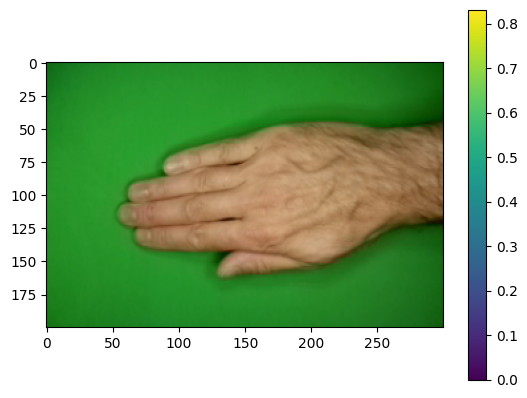

In [ ]:
plt.figure()
plt.imshow(x_train[10])
plt.colorbar()
plt.grid(False)
plt.show

In [ ]:
y_train[0][:].astype(int)

array([1, 0, 0])

In [ ]:
def index_for_class_names(y_train): # My cool method)
  array= []
  for i in range(len(y_train)):
    array.append(np.where(y_train[i] == 1)[0][0])
  return array

#class_names_indexes = cni
cni_train = index_for_class_names(y_train)
#y_train[0][:].astype(int)

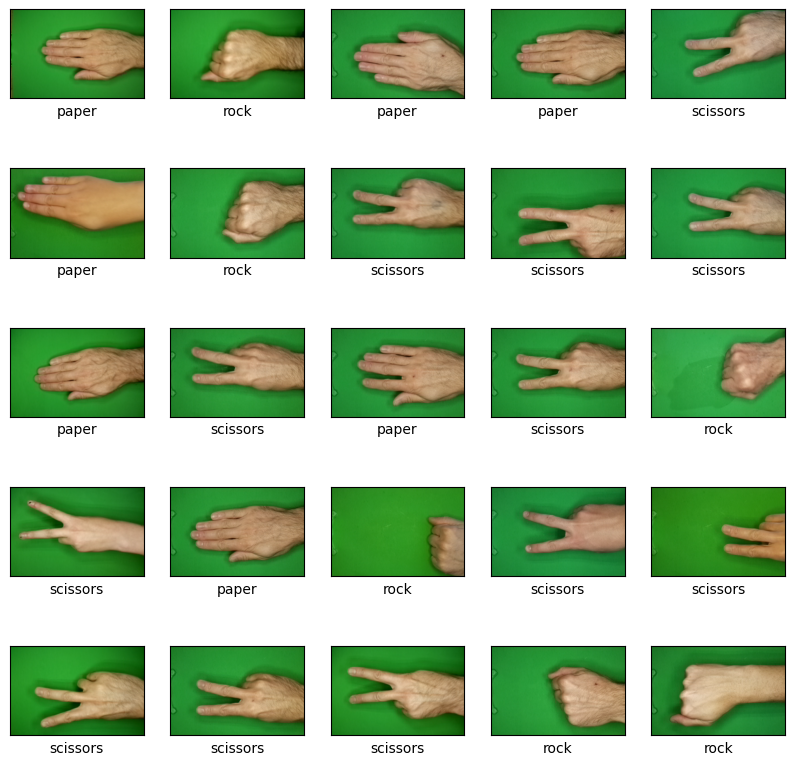

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  #plt.grid(False)
  #plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[cni_train[i]])
plt.show()


In [ ]:
# Build the model
model = Sequential([
    Flatten(input_shape=(img_size[0], img_size[1], 3)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),


    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
55/55 [==============================] - 100s 2s/step - loss: 1.7319 - accuracy: 0.3383
Epoch 2/10
55/55 [==============================] - 97s 2s/step - loss: 1.1060 - accuracy: 0.3914
Epoch 3/10
55/55 [==============================] - 99s 2s/step - loss: 0.8200 - accuracy: 0.6383
Epoch 4/10
55/55 [==============================] - 102s 2s/step - loss: 0.7033 - accuracy: 0.7080
Epoch 5/10
55/55 [==============================] - 95s 2s/step - loss: 0.7272 - accuracy: 0.6703
Epoch 6/10
55/55 [==============================] - 97s 2s/step - loss: 0.5734 - accuracy: 0.7771
Epoch 7/10
55/55 [==============================] - 97s 2s/step - loss: 0.5908 - accuracy: 0.7766
Epoch 8/10
55/55 [==============================] - 96s 2s/step - loss: 0.5217 - accuracy: 0.8063
Epoch 9/10
55/55 [==============================] - 96s 2s/step - loss: 0.4489 - accuracy: 0.8469
Epoch 10/10
55/55 [==============================] - 94s 2s/step - loss: 0.4384 - accuracy: 0.8434


In [ ]:
'''
# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,  # You can change the number of epochs
    batch_size=32
)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')
'''

"\n# Train the model\nhistory = model.fit(\n    x_train, y_train,\n    validation_data=(x_test, y_test),\n    epochs=10,  # You can change the number of epochs\n    batch_size=32\n)\n\n# Evaluate the model\nloss, accuracy = model.evaluate(x_test, y_test)\nprint(f'Test Accuracy: {accuracy*100:.2f}%')\n"

In [ ]:
x_test.shape

(438, 200, 300, 3)

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

14/14 - 3s - loss: 0.4209 - accuracy: 0.8584 - 3s/epoch - 229ms/step

Test accuracy: 0.8584474921226501


The input data for training must be standartized

#Make Prediction

With the model trained you can use it to make predictions about some images.

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(x_test)

14/14 [==============================] - 2s 151ms/step


In [ ]:
predictions[0]

array([0.5663615 , 0.21944277, 0.21419577], dtype=float32)

A prediction is an array of 10 numbers with number of confidence it has for every category. Here, it shows that element[0] has 57.6% of being an scissors sign



In [ ]:
np.argmax(predictions[0])

0

In [ ]:
y_test[0]

array([1., 0., 0.], dtype=float32)

In [ ]:
index_temp = 11
print('The Prediction for index ' + str(index_temp) +' is '+ class_names[np.argmax(predictions[index_temp])])
print('The Real answer for index ' + str(index_temp) +' is '+ class_names[np.argmax(y_test[index_temp])])


The Prediction for index 11 is scissors
The Real answer for index 11 is scissors


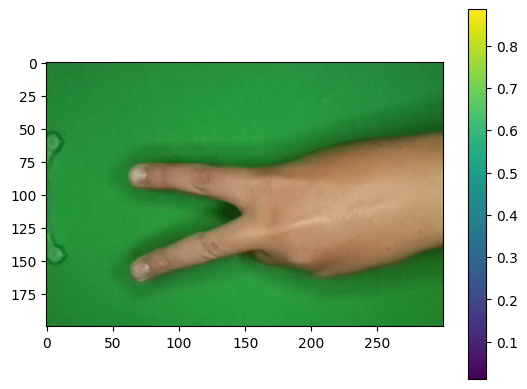

In [ ]:
plt.figure()
plt.imshow(x_test[index_temp])
plt.colorbar()
plt.grid(False)
plt.show()